In [28]:
# Import depedencies
import pandas as pd
import numpy as np

In [30]:
# Read the CSV data and create a new dataframe

df = pd.read_csv("match_team_data (1).csv")

In [31]:
# Create a column to account for Wins, Losses, and Ties
# Win = 1 , Loss = 0, Tie = -1

df["home_win"] = np.where(df["home_score"] > df["away_score"], 1, np.where(df["home_score"] == df["away_score"],0,-1))

In [32]:
# Check for NaNs
df2.isna().mean().sort_values(ascending=False).head(10)

winning_name                0.079338
winning_abbr                0.079338
losing_name                 0.079338
losing_abbr                 0.079338
away_score                  0.075625
home_score                  0.075625
boxscore                    0.000000
team_2_margin_of_victory    0.000000
team_2_pass_yards           0.000000
team_2_pass_touchdowns      0.000000
dtype: float64

In [33]:
# Check status of null values

df2["winning_name"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2957     True
2958     True
2959     True
2960     True
2961     True
Name: winning_name, Length: 2962, dtype: bool

In [34]:
# Remove NaNs and create new df

df2 = df.drop(columns=["team_2_post_season_result","team_1_post_season_result"])

In [35]:
# Drop null values and creat new df

df3 = df2.dropna()

In [36]:
# Check for categorical data

df3.dtypes.sort_values().tail(15)

team_1_points_contributed_by_offense    float64
away_name                                object
away_abbr                                object
home_name                                object
home_abbr                                object
team_2_abbreviation                      object
losing_name                              object
winning_abbr                             object
losing_abbr                              object
teams                                    object
team_1_abbreviation                      object
team_2_name                              object
team_1_name                              object
winning_name                             object
boxscore                                 object
dtype: object

In [37]:
# Remove categorical data

df3.drop(columns=["away_name","away_abbr","home_name","home_abbr","team_2_abbreviation","losing_name","winning_abbr","losing_abbr","teams","team_1_abbreviation","team_2_name","team_1_name","winning_name","boxscore"], inplace=True)

/var/folders/xf/5gg0rlzs2xlbl_dwfhdrq43h0000gn/T/ipykernel_29497/1997902423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=["away_name","away_abbr","home_name","home_abbr","team_2_abbreviation","losing_name","winning_abbr","losing_abbr","teams","team_1_abbreviation","team_2_name","team_1_name","winning_name","boxscore"], inplace=True)


In [38]:
# Remove categorical data

df3.drop(columns=["year","week","home_score","away_score"], inplace=True)

/var/folders/xf/5gg0rlzs2xlbl_dwfhdrq43h0000gn/T/ipykernel_29497/659904871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=["year","week","home_score","away_score"], inplace=True)


In [39]:
# Create target and features

y = df3["home_win"]
X = df3.drop(columns="home_win")

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Apply Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Set the scaler
scaler = StandardScaler()

In [46]:
# Fit and Transform the data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Create the model
model = RandomForestClassifier()

In [50]:
# Fit the data
model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
# Make the predictions
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [100]:
# print the results

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[166 197]
 [175 281]]
              precision    recall  f1-score   support

          -1       0.49      0.46      0.47       363
           1       0.59      0.62      0.60       456

    accuracy                           0.55       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.54      0.55      0.54       819

0.5457875457875457


In [101]:
# Create list of model feature names

importances_names = model.feature_names_in_

In [102]:
# View importances of features in Random Forest Model

#importances = model.feature_importances_

importances=model.feature_importances_
indices = np.argsort(importances)[::-1]  # index value of a feature
names = [X_train.columns[i] for i in indices]  # extract the title of that feature

In [103]:
names[:10]

['team_1_yards_from_penalties',
 'team_2_percent_drives_with_points',
 'team_1_percent_drives_with_points',
 'team_2_rank',
 'team_2_points_for',
 'team_2_first_downs',
 'team_2_plays',
 'team_2_offensive_simple_rating_system',
 'team_1_rush_attempts',
 'team_1_rush_yards']

In [104]:
# Create df that displays importances

importances_df = pd.DataFrame(importances,importances_names)

In [105]:
# Sort importances by values

importances_df.sort_values(ascending = False, by = [0]).tail(10)

,0
team_2_pass_touchdowns,0.011141
team_1_turnovers,0.010882
team_2_fumbles,0.010781
team_2_interceptions,0.010028
team_1_interceptions,0.009044
team_2_rush_touchdowns,0.008631
team_1_pass_touchdowns,0.008327
team_1_rush_touchdowns,0.007963
team_2_win_percentage,0.007074
team_1_win_percentage,0.006642


<AxesSubplot:>

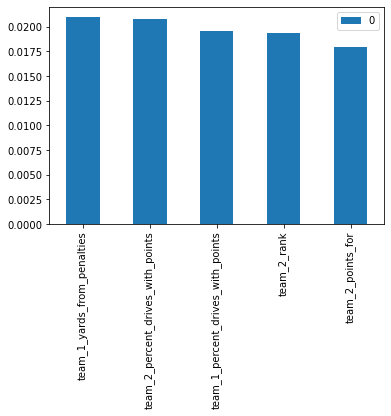

In [106]:
importances_df.sort_values(by = 0, ascending=False).head().plot(kind = "bar")

In [107]:
# View importances details

importances_df.describe()

,0
count,68.000000
mean,0.014706
std,0.003072
min,0.006642
25%,0.013309
50%,0.015129
75%,0.016875
max,0.020988


In [108]:
# Drop unimportant features and create new df

df4 = df3.drop(columns=["team_1_games_played","team_2_games_played","team_2_losses","team_1_wins","team_2_wins","team_1_losses"])

In [109]:
# Create new X and Y variables without dropped features

y = df4["home_win"]
X = df4.drop(columns="home_win")

In [110]:
# Create X and Y train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [111]:
# Scale X values

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [112]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
# Create y predictions

y_pred = model.predict(X_test)

In [114]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[145 153]
 [145 239]]
              precision    recall  f1-score   support

          -1       0.50      0.49      0.49       298
           1       0.61      0.62      0.62       384

    accuracy                           0.56       682
   macro avg       0.55      0.55      0.55       682
weighted avg       0.56      0.56      0.56       682

0.5630498533724341


In [115]:
# Import scaler 

from sklearn.preprocessing import MinMaxScaler

In [116]:
# Set scaler

scaler = MinMaxScaler()

In [117]:
# Fit X data to scaler

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [118]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
# Create y predictions

y_pred = model.predict(X_test)

In [120]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[134 164]
 [145 239]]
              precision    recall  f1-score   support

          -1       0.48      0.45      0.46       298
           1       0.59      0.62      0.61       384

    accuracy                           0.55       682
   macro avg       0.54      0.54      0.54       682
weighted avg       0.54      0.55      0.54       682

0.5469208211143695


In [121]:
# Import Scaler

from sklearn.preprocessing import RobustScaler

In [122]:
# Set scaler

scaler = RobustScaler()

In [123]:
# Scale X data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
# Set y predictions 

y_pred = model.predict(X_test)

In [126]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[132 166]
 [137 247]]
              precision    recall  f1-score   support

          -1       0.49      0.44      0.47       298
           1       0.60      0.64      0.62       384

    accuracy                           0.56       682
   macro avg       0.54      0.54      0.54       682
weighted avg       0.55      0.56      0.55       682

0.5557184750733137


In [127]:
# Split X and Y data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=.3)

In [128]:
# Scale X data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [129]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
# Set y predictions

y_pred = model.predict(X_test)

In [131]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[166 197]
 [170 286]]
              precision    recall  f1-score   support

          -1       0.49      0.46      0.47       363
           1       0.59      0.63      0.61       456

    accuracy                           0.55       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.55      0.55      0.55       819

0.5518925518925519


In [132]:
# Import Scaler

from sklearn.preprocessing import MaxAbsScaler

In [133]:
# Set scaler

scaler = MaxAbsScaler()

In [134]:
# Scale X data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [135]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
# Set y predictions

y_pred = model.predict(X_test)

In [137]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[169 194]
 [170 286]]
              precision    recall  f1-score   support

          -1       0.50      0.47      0.48       363
           1       0.60      0.63      0.61       456

    accuracy                           0.56       819
   macro avg       0.55      0.55      0.55       819
weighted avg       0.55      0.56      0.55       819

0.5555555555555556


In [138]:
# Import Counter

from collections import Counter 

In [139]:
# Import Oversampler

from imblearn.over_sampling import RandomOverSampler

In [141]:
# Set model

ros = RandomOverSampler(random_state=1)

In [142]:
# Fit model sampler

X_train_oversampled,y_train_oversampled = ros.fit_resample(X_train, y_train) 

In [143]:
# Fit model

model.fit(X_train_oversampled,y_train_oversampled)

RandomForestClassifier()

In [144]:
# Make predictions

y_pred = model.predict(X_test)

In [145]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[187 176]
 [200 256]]
              precision    recall  f1-score   support

          -1       0.48      0.52      0.50       363
           1       0.59      0.56      0.58       456

    accuracy                           0.54       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.54      0.54      0.54       819

0.5409035409035409
